<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/database-exercise-bastienm69/blob/main/Assignment_TWO_Raw_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K723: Datamining and Business Intelligence <br>Python for AI & Machine Learning

## Assignment No. 2: Social Network Analysis

**Submission Date: Sunday, Nov 7, 2025, Before midnight** <br>

**Purpose**: In this assignment, the concept of social network analysis was explored using Jupyter notebook. Network density, size, and the characteristics it embodies were analyzed to better understand the social structure and the behavior exhibited by subjects under study.

**Name and Student Number**
<div class="alert alert-block alert-info">
    <b>Student Information:</b><BR>
    <ul>
        <li>Student Name:<b> Bastien Maillet</b></li>
        <li>Student Number:<b> 400677332</b></li>
        <li>MAC ID:<b> bmaillet</b></li>
    </ul>
</div>     

**The following instructions have been followed to complete this assignment**
- **Questions will appear in red alert blocks.**
<div class="alert alert-block alert-danger"> <b>Question Number:</b> The body of the Question.</div>

    - **For some questions, a modified code has been ran**
    - **For some questions, short reports inside green alert boxes have been written**

<div class="alert alert-block alert-success"> <b>A title: (Optional)</b> Answer. A part of the answer was bolded <b>bold</b>, <i>italic</i>, or <u>underlined</u> </div>

- **Yellow alert blocks have been used to add helpful comments.**
<div class="alert alert-block alert-warning"> <b>Comment Title:</b> Comment Itself </div>

**The following packages have been used to complete this assignment**
<li><i>numpy</i> for data handling</li>
<li><i>pandas</i> for data handling</li>
<li><i>networkx</i> for network analysis </li>
<li><i>matplotlib</i> for graphics </li>

**To complete the requirements for this assignment, the following data set has been used**
- `classmates.csv`
- `classMatesChar.csv`
- The data set and notebook has been saved in my `working directory`
- The outcomes of the code have been used to answer questions

In [1]:
from pathlib import Path

import collections
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
import operator
%matplotlib inline

**Undirected Network**
<div class="alert alert-block alert-warning">
<b>Edges have no direction</b>
</div>   

**Part 1. Describing a Network (10%)**
<div class="alert alert-block alert-warning">
    <b>Consider an undirected network for individuals A, B, C, D, E, and F:<BR>
•	A is connected to B and C. <BR>
•	B is connected to A, C, and E. <BR>
•	C is connected to A, B, and D. <BR>
•	D is connected to C, E and F. <BR>
•	E is connected to D and B.<BR>
•	F is connected to D and A.<BR>
</b>
</div>

<div class="alert alert-block alert-danger">
    <ul>
        <li><b>Question 1</b>:Produce a network plot for this network. (2%)</li>
        <li><b>Question 2</b>:What is the largest clique in the graph? (1%)</li>
        <li><b>Question 3</b>:What is the degree for node A? (2%)</li>
        <li><b>Question 4</b>:Which node(s) have the lowest degree? (1%)</li>
        <li><b>Question 5</b>:Tabulate the degree distribution for this network. (1%)</li>
        <li><b>Question 6</b>:Is this network connected? (1%)</li>
        <li><b>Question 7</b>:Calculate the betweenness centrality for nodes A and C. (1%)</li>
        <li><b>Question 8</b>:Calculate the density of the network. (1%)</li>
    </ul>
</div>

<div class="alert alert-block alert-warning">
<b>A clique is a network in which each node is directly connected by an edge to every other
node. The connections must all be single edges.</b>
</div>   

**Question 1: Produce a network plot for this network. (2%)**

In [6]:
# Define the graph
G1 = nx.Graph()
G1.add_edge('A', 'B')
G1.add_edge('A', 'C')
G1.add_edge('B', 'C')
G1.add_edge('B', 'E')
G1.add_edge('C', 'D')
G1.add_edge('D', 'E')
G1.add_edge('D', 'F')
G1.add_edge('E', 'B')
G1.add_edge('F', 'A')

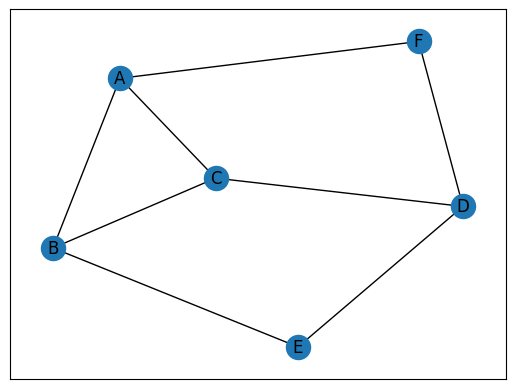

In [7]:
# Plot it
nx.draw_networkx(G1, with_labels=True)
plt.show()


**Question 2: What is the largest clique in the graph? (1%)**

In [9]:
# find the maximum clique
cliques = list(nx.find_cliques(G1))
largest_clique = max(cliques, key=len)
print("The largest clique is:", largest_clique)

The largest clique is: ['C', 'A', 'B']


**Question 3: What is the degree for nodes A and D? (2%)**

In [11]:
degree_A = G1.degree('A')
degree_D = G1.degree('D')

print(f"The degree for node A is: {degree_A}")
print(f"The degree for node D is: {degree_D}")

The degree for node A is: 3
The degree for node D is: 3


**Question 4: Which node(s) have the lowest degree? (1%)**

In [13]:
degrees = dict(G1.degree())
min_degree = min(degrees.values())
lowest_degree_nodes = [node for node, degree in degrees.items() if degree == min_degree]
print("Node(s) with the lowest degree:", lowest_degree_nodes)

Node(s) with the lowest degree: ['E', 'F']


**Question 5: Tabulate the degree distribution for this network. (1%)**

In [14]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, count = zip(*degree_count.items())

print("Degree Distribution:")
for d, c in degree_count.items():
    print(f"Degree {d}: {c} nodes")

Degree Distribution:
Degree 3: 4 nodes
Degree 2: 2 nodes


**Question 6: Is this network connected? (1%)**

In [17]:
is_connected = nx.is_connected(G1)

print(f"Is the network connected? {is_connected}")

Is the network connected? True


**Question 7: Calculate the betweenness centrality for nodes A and D. (1%)**

In [18]:
betweenness_centrality = nx.betweenness_centrality(G1)

print(f"Betweenness centrality for node A: {betweenness_centrality['A']}")
print(f"Betweenness centrality for node D: {betweenness_centrality['D']}")

Betweenness centrality for node A: 0.15000000000000002
Betweenness centrality for node D: 0.2


**Question 8: Calculate the density of the network. (1%)**

In [20]:
density = nx.density(G1)

print(f"The density of the network is: {density}")

The density of the network is: 0.5333333333333333


**Part 2. Network Density and Size (10%)**
<div class="alert alert-block alert-warning">
    <b>Imagine that two new nodes are added to the undirected network in the previous exercise (G and H).</b>
</div>

**This is still an Undirected Network as per the Question**
<div class="alert alert-block alert-warning">
<b>Edges have no direction</b>
</div>   

<div class="alert alert-block alert-danger">
    <ul>
        <li><b>Question 1</b>:By what percent has the number of nodes increased? (2%)</li>
        <li><b>Question 2</b>:By what percent has the number of possible edges increased? (2%)</li>
        <li><b>Question 3</b>:Connect each of the new nodes to two other nodes. (G to A and B, and H to F and E) What will happen to network density? (2%)</li>
        <li><b>Question 4</b>:Comment on comparing densities in the original network and the extended network. (2%)</li>
        <li><b>Question 5</b>:Tabulate the degree distribution for this network. (2%)</li>
    </ul>
</div>

**Question 1: By what percent has the number of nodes increased? (2%)**

In [21]:
# Add new nodes G and H
G2 = G1.copy()
G2.add_nodes_from(['G', 'H'])

original_num_nodes = G1.number_of_nodes()
new_num_nodes = G2.number_of_nodes()

percentage_increase_nodes = ((new_num_nodes - original_num_nodes) / original_num_nodes) * 100

print(f"Original number of nodes: {original_num_nodes}")
print(f"New number of nodes: {new_num_nodes}")
print(f"Percentage increase in the number of nodes: {percentage_increase_nodes:.2f}%")

Original number of nodes: 6
New number of nodes: 8
Percentage increase in the number of nodes: 33.33%


**Question 2: By what percent has the number of possible edges increased? (2%)**

In [24]:
# Calculate the original and extended number of possible edges
original_possible_edges = (original_num_nodes * (original_num_nodes - 1)) / 2
new_possible_edges = (new_num_nodes * (new_num_nodes - 1)) / 2

percentage_increase_possible_edges = ((new_possible_edges - original_possible_edges) / original_possible_edges) * 100

print(f"Original number of possible edges: {original_possible_edges}")
print(f"New number of possible edges: {new_possible_edges}")
print(f"Percentage increase in the number of possible edges: {percentage_increase_possible_edges:.2f}%")

Original number of possible edges: 15.0
New number of possible edges: 28.0
Percentage increase in the number of possible edges: 86.67%


**Question 3: Connect each of the new nodes to two other nodes. (G to A and B, and H to F and E) What will happen to network density? (2%)** <BR>
*Calculate density to original and extended network and compare them*

In [25]:
# Connect new nodes
G2.add_edge('G', 'A')
G2.add_edge('G', 'B')
G2.add_edge('H', 'F')
G2.add_edge('H', 'E')

In [26]:
# Calculate and compare densities
original_density = nx.density(G1)
new_density = nx.density(G2)

print(f"Density of the original network: {original_density:.4f}")
print(f"Density of the extended network: {new_density:.4f}")

Density of the original network: 0.5333
Density of the extended network: 0.4286


**Question 4: Comment on comparing densities in networks of different sizes. (2%)**

<div class="alert alert-block alert-success">
    <b> Network density is highly influenced by the number of nodes in a network. As the network expands and new nodes are added, the total number of possible edges grows much faster than the number of actual edges formed. Consequently, even when additional connections are introduced, the overall density tends to decrease because the network becomes relatively sparser.</b>
</div>

**Question 5: Tabulate the degree distribution for this network. (2%)**

In [27]:
degree_sequence_G2 = sorted([d for n, d in G2.degree()], reverse=True)
degree_count_G2 = collections.Counter(degree_sequence_G2)

print("Degree Distribution for Extended Network:")
for d, c in degree_count_G2.items():
    print(f"Degree {d}: {c} nodes")

Degree Distribution for Extended Network:
Degree 4: 2 nodes
Degree 3: 4 nodes
Degree 2: 2 nodes


**Part 3. Social Network Analysis (80%)**
<div class="alert alert-block alert-warning">
    <b>Download and use the following two .csv files to answer the questions in this section:</b>
            <ul>
        <li>The friendship network (classmates.csv) shows who in a class with 25 students are
friends with whom.</li>
        <li>The characteristics of classmates (classmatesChar.csv), which contains names, gender,
and the number of sessions they attended the class.</li>
    </ul>
</div>

**Section 3.1. Network Characteristics (50%)**

<div class="alert alert-block alert-danger">
    <ul>
        <li><b>Question 1</b>:Create the network (7.5%).</li>
            <ul>
                <li>Read classmates’ characteristics from classmatesChar.csv and add attributes to nodes.</li>
                <li>Node labels will be students’ names.</li>
                <li>Each node will have gender and attendance attributes.</li>
                <li>Create the graph with different node colours for males and females and node size equal to students’ attendance (multiplied by 200).</li>
            </ul>   
        <li><b>Question 2</b>:What is the density of the network? What does it mean? (2.5%)</li>
        <li><b>Question 3</b>:What percentage of pairs of students with common friends are not friends with each other (2.5%)</li>
        <li><b>Question 4</b>:Who are the top five most and the bottom five least popular people in the class? (2.5%)</li>
        <li><b>Question 5</b>:Who are the top five people that could introduce students to one another? (2.5%)</li>
        <li><b>Question 6</b>:Ben wants to ask Riley out. However, he wants to make sure that he will not be rejected. He also does not want more than necessary people know about this exchange of message. Who are the people that can exchange the message between Ben to Riley? With what sequences?
(2.5%)</li>
        <li><b>Question 7</b>:In this class, it takes one hour for a rumor to spread from one student to a friend. What is the average amount of time it would take for all students in the class to hear the rumor? (2.5%)</li>
        <li><b>Question 8</b>:What is the longest time (in hours) for a student to here about a potential rumor started by any other student? (2.5%)</li>
        <li><b>Question 9</b>:Who are the people who hear class rumors first? Why these students? (2.5%)</li>
        <li><b>Question 10</b>:Which members are last to hear about things? Why these students? (2.5%)</li>
        <li><b>Question 11</b>:What is Eigenvector-based centrality, and how does it differ from the other measures we studied? (10%)</li>
        <li><b>Question 12</b>:A new textbook was launched a few months ago. The publisher wants to select a couple of students in each class and give them a free copy and ask them to promote the book. Which two students should be chosen? Why these two? (10%)</li>
    </ul>
</div>

<div class="alert alert-block alert-warning">
    <b>Read classmates’ characteristics from classmatesChar.csv and add attributes to nodes</b>
            <ul>
        <li>Node labels will be students’ names.</li>
        <li>Each node will have gender and attendance attributes.</li>
        <li>Create the graph with different node colours for males and females and node size equal
to students’ attendance (multiplied by 200).</li>
    </ul>
</div>

**Question 1: Create the network (7.5%)**
- Read classmates’ characteristics from classmatesChar.csv and add attributes to nodes.
    - Node labels will be students’ names.
    - Each node will have gender and attendance attributes.
- Create the graph with different node colours for males and females and node size equal to students’ attendance (multiplied by 200).


In [35]:
classmates_df = pd.read_csv('classmates.csv')
classmates_char_df = pd.read_csv('classmatesChar.csv')

In [53]:
# Create the graph with student names as nodes and add attributes from classmates_char_df
G_classmates = nx.Graph()

# Add nodes and attributes from classmates_char_df
for index, row in classmates_char_df.iterrows():
    G_classmates.add_node(row['Name'], Gender=row['Gender'], Attendance=row['Attendance'])

# Add edges from classmates_df (assuming it's an adjacency matrix)
# We need to map the numerical indices in classmates_df to the student names
name_mapping = classmates_char_df['Name'].to_list()
for i in range(classmates_df.shape[0]):
    for j in range(classmates_df.shape[1]):
        # Check if the value is 1 and if the indices are within the bounds of the name_mapping list
        if classmates_df.iloc[i, j] == 1 and i < len(name_mapping) and j < len(name_mapping):
            # Add edge between the student corresponding to row index i and column index j
            G_classmates.add_edge(name_mapping[i], name_mapping[j])

# Verify that attributes are correctly assigned (optional)
# for node in G_classmates.nodes(data=True):
#     print(node)

In [57]:
# Create lists for node colors and sizes
node_colors = []
node_sizes = []
for node in G_classmates.nodes():
    # Check the data type of the 'Gender' attribute and handle accordingly
    gender = G_classmates.nodes[node]['Gender']
    if isinstance(gender, str):
        if gender.lower() == 'male':
            node_colors.append('blue')
        else:
            node_colors.append('red')
    # Assuming 1 for Male and 0 for Female based on previous observation in classmates_char_df
    elif isinstance(gender, (int, float)):
        if int(gender) == 1:
            node_colors.append('blue')
        else:
            node_colors.append('red')
    else:
        node_colors.append('gray') # Default color if gender is neither string nor number

    node_sizes.append(G_classmates.nodes[node]['Attendance'] * 200)

<div class="alert alert-block alert-danger">
    <ul>
        <li>Create the graph with different node colours for males and females and node size equal
to students’ attendance (multiplied by 200).</li>
    </ul>
</div>

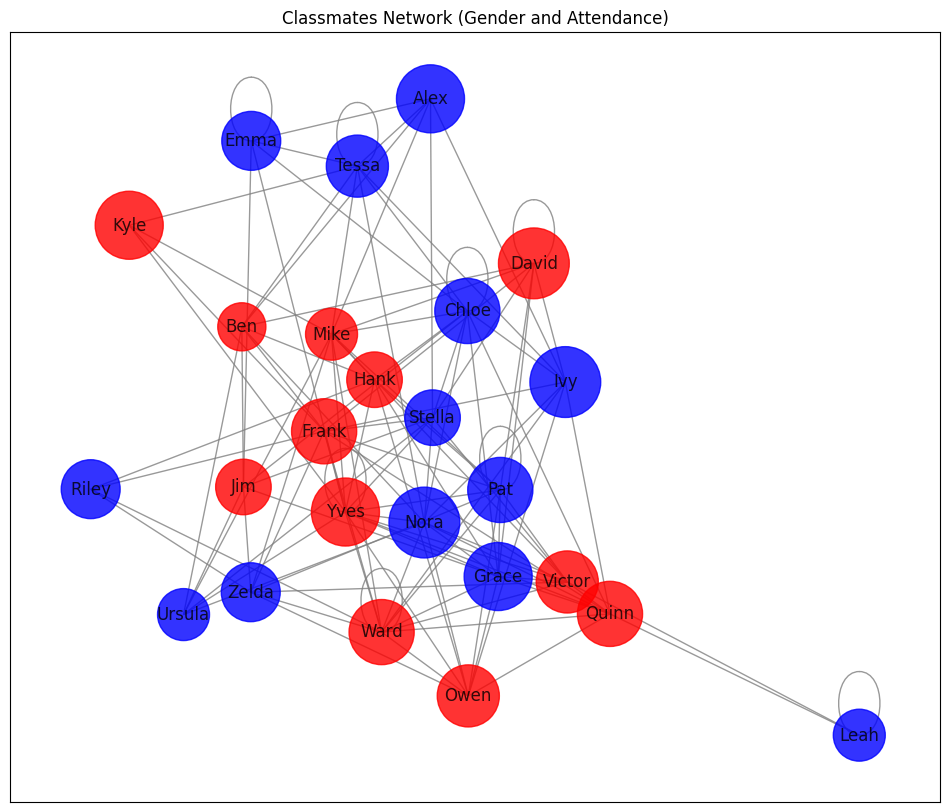

In [56]:
# Draw the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_classmates)  # You can use different layout algorithms
nx.draw_networkx(G_classmates, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='gray', alpha=0.8)
plt.title('Classmates Network (Gender and Attendance)')
plt.show()

**Question 2: What is the density of the network? What does it mean? (2.5%)**

In [59]:
# Network Density
density_classmates = nx.density(G_classmates)

print(f"The density of the network is: {density_classmates:.4f}")

The density of the network is: 0.3800


<div class="alert alert-block alert-success">
    <b>The density of the network is 0.38. It means 38% of all the possible connections between nodes actually exist in your network.</b>
</div>

**Question 3: What percentage of pairs of students with common friends are not friends with each other. (2.5%)**

In [60]:
# Calculate the number of pairs with common neighbors who are not friends
unconnected_common_neighbors = 0
total_common_neighbors_pairs = 0

for u, v in nx.non_edges(G_classmates):
    common_neighbors = list(nx.common_neighbors(G_classmates, u, v))
    if len(common_neighbors) > 0:
        unconnected_common_neighbors += 1
    total_common_neighbors_pairs += 1

# Calculate the percentage
if total_common_neighbors_pairs > 0:
    percentage_not_friends = (unconnected_common_neighbors / total_common_neighbors_pairs) * 100
    print(f"Percentage of pairs of students with common friends who are not friends: {percentage_not_friends:.2f}%")
else:
    print("There are no pairs of students with common friends.")

Percentage of pairs of students with common friends who are not friends: 91.24%


<div class="alert alert-block alert-success">
    <b> Thanks to our python analysis, the percentage of pairs of students with common friends who are not friends is 91.24%. </b>
</div>

**Question 4: Who are the top five most and the bottom five least popular people in the class? (2.5%)**

In [61]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_classmates)

# Sort by degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)

# Get top 5 most popular
top_5_popular = sorted_degree_centrality[:5]
print("Top 5 most popular students (by degree centrality):")
for student, centrality in top_5_popular:
    print(f"{student}: {centrality:.4f}")

print("\n")

# Get bottom 5 least popular
bottom_5_popular = sorted_degree_centrality[-5:]
print("Bottom 5 least popular students (by degree centrality):")
for student, centrality in bottom_5_popular:
    print(f"{student}: {centrality:.4f}")

Top 5 most popular students (by degree centrality):
Yves: 0.6667
Ward: 0.5833
Chloe: 0.5000
Mike: 0.5000
Nora: 0.5000


Bottom 5 least popular students (by degree centrality):
Alex: 0.2500
Ursula: 0.2500
Kyle: 0.1667
Leah: 0.1667
Riley: 0.1667


**Question 5: Who are the top five people that could introduce students to one another? (2.5%)**

In [62]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_classmates)

# Sort by betweenness centrality
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)

# Get top 5 connectors
top_5_connectors = sorted_betweenness_centrality[:5]
print("Top 5 students who can introduce others (by betweenness centrality):")
for student, centrality in top_5_connectors:
    print(f"{student}: {centrality:.4f}")

Top 5 students who can introduce others (by betweenness centrality):
Yves: 0.0924
Mike: 0.0794
Frank: 0.0626
Nora: 0.0525
Victor: 0.0521


**Question 6: Ben wants to ask Riley out. However, he wants to make sure that he will not be rejected. He also does not want more than necessary people know about this exchange of message. Who are the people that can exchange the message between Ben to Riley? With what sequences?
(2.5%)**

In [63]:
# Find all shortest paths between Ben and Riley
shortest_paths = list(nx.all_shortest_paths(G_classmates, source='Ben', target='Riley'))

print(f"Shortest path(s) between Ben and Riley:")
for path in shortest_paths:
    print(path)

Shortest path(s) between Ben and Riley:
['Ben', 'Frank', 'Riley']
['Ben', 'Hank', 'Riley']


**Question 7: In this class, it takes one hour for a rumor to spread from one student to a friend. What is the average amount of time it would take for all students in the class to hear the rumor? (2.5%)**

In [64]:
# Calculate the average shortest path length
average_shortest_path = nx.average_shortest_path_length(G_classmates)

print(f"The average amount of time for a rumor to spread to all students is approximately: {average_shortest_path:.2f} hours")

The average amount of time for a rumor to spread to all students is approximately: 1.70 hours


**Question 8: What is the longest time (in hours) for a student to here about a potential rumor started by any other student? (2.5%)**

In [65]:
# Calculate the diameter of the network
diameter = nx.diameter(G_classmates)

print(f"The longest time for a rumor to spread between any two students is: {diameter} hours")

The longest time for a rumor to spread between any two students is: 3 hours


**Question 9: Who are the people that hear class rumors first? Why these students? (2.5%)**

In [69]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G_classmates)

# Sort by closeness centrality
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)

print("Students who hear rumors first (by closeness centrality):")
for student, centrality in sorted_closeness_centrality[:5]:
    print(f"{student}: {centrality:.4f}")

Students who hear rumors first (by closeness centrality):
Yves: 0.7059
Mike: 0.6667
Nora: 0.6667
Ward: 0.6667
Frank: 0.6486


**Question 10: Which members are last to hear about rumors? Why these students? (2.5%)**

In [70]:
# Sort by closeness centrality in ascending order
sorted_closeness_centrality_asc = sorted(closeness_centrality.items(), key=operator.itemgetter(1))

print("Students who are last to hear rumors (by closeness centrality):")
for student, centrality in sorted_closeness_centrality_asc[:5]: # Print bottom 5
    print(f"{student}: {centrality:.4f}")

Students who are last to hear rumors (by closeness centrality):
Leah: 0.4286
Riley: 0.4898
Emma: 0.5217
Kyle: 0.5217
Alex: 0.5333


**Question 11: What is Eigenvector-based centrality, and how does it differ from the other measures we
studied? (10%)**

<div class="alert alert-block alert-success">
    <b> Eigenvector centrality measures a node’s influence in a network not only by how many connections it has, but also by how important or well-connected its neighbors are. In other words, a node gains a higher score if it is connected to other nodes that themselves have high centrality values. It is based on the idea that “connections to influential nodes are more valuable than connections to less influential ones.” Mathematically, it is derived from the eigenvector corresponding to the largest eigenvalue of the network’s adjacency matrix. </b>
</div>

**Question 12: A new textbook was launched a few months ago. The publisher wants to select a couple of
students in each class and give them a free copy and ask them to promote the book. Which two
students should be chosen? Why these two? (10%)**

In [72]:
# Calculate Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G_classmates)

# Sort by Eigenvector centrality
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=operator.itemgetter(1), reverse=True)

print("Top 5 students by Eigenvector Centrality:")
for student, centrality in sorted_eigenvector_centrality[:5]:
    print(f"{student}: {centrality:.4f}")

# Recommend the top two students
recommended_students = sorted_eigenvector_centrality[:2]

print("\nRecommended students for textbook promotion:")
for student, centrality in recommended_students:
    print(f"- {student} (Eigenvector Centrality: {centrality:.4f})")

Top 5 students by Eigenvector Centrality:
Yves: 0.3320
Ward: 0.3080
Pat: 0.2641
Nora: 0.2641
Grace: 0.2587

Recommended students for textbook promotion:
- Yves (Eigenvector Centrality: 0.3320)
- Ward (Eigenvector Centrality: 0.3080)


<div class="alert alert-block alert-success">
    <b> The publisher should select the two highly influential studentw (high eigenvector centrality) because they will maximize both influence and reach, ensuring the textbook promotion spreads efficiently throughout the class network. Thus, it would be Yves and Ward. </b>
</div>

**Part 4. Network Analysis (30%)**

<div class="alert alert-block alert-danger">
    <ul>
        <li><b>Question 1 (10%)</b>:Add the following columns to the data frame you created from classmatesChar.csv. Closeness centrality, Degree centrality, Betweenness centrality, Eigenvector-based centrality</li>
        <li><b>Question 2 (20%)</b>:Develop two linear regression models (10% for each) to explore the relationships between students’ characteristics and <BR>
•	Degree Centrality (Model ONE) <BR>
•	Eigenvector-based centrality (Model TWO) <BR>
•	Train both models with 80% of the dataset and test it with the 20%.  <BR>
•	Write the regression formula between students’ characteristics and two centrality measures. <BR>
•	What are Adjusted R2 for each model? <BR>
</li>
    </ul>
</div>

**Question 1. Add the following columns to the data frame you created from classmatesChar.csv. Closeness centrality, Degree centrality, Betweenness centrality, Eigenvector-based centrality (10%)**

In [73]:
# Add centrality measures to the DataFrame
classmates_char_df['Closeness_Centrality'] = classmates_char_df['Name'].map(closeness_centrality)
classmates_char_df['Degree_Centrality'] = classmates_char_df['Name'].map(degree_centrality)
classmates_char_df['Betweenness_Centrality'] = classmates_char_df['Name'].map(betweenness_centrality)
classmates_char_df['Eigenvector_Centrality'] = classmates_char_df['Name'].map(eigenvector_centrality)

# Display the updated DataFrame
display(classmates_char_df.head())

,Name,Gender,Attendance,Participation,Social_Intelligence_Index,Closeness_Centrality,Degree_Centrality,Betweenness_Centrality,Eigenvector_Centrality
0,Alex,1,12,12.3,58,0.533333,0.250000,0.010304,0.102230
1,Ben,0,6,1.3,23,0.585366,0.333333,0.029238,0.135945
2,Chloe,1,11,11.0,49,0.631579,0.500000,0.041706,0.217930
3,David,0,13,9.3,60,0.558140,0.375000,0.011603,0.168707
4,Emma,1,9,9.3,35,0.521739,0.291667,0.007623,0.104753


**Question 2 (20%)** Develop two linear regression models (10% for each) to explore the relationships between students’ characteristics and
- Degree Centrality (Model ONE)
- Eigenvector-based centrality (Model TWO)
- Train both models with 80% of the dataset and test it with the 20%.
- Write the regression formula between students’ characteristics and two centrality measures.
- What are Adjusted R2 for each model?


In [76]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define features (student characteristics) and target variables (centrality measures)
features = ['Gender', 'Attendance', 'Participation', 'Social_Intelligence_Index']
target_degree = 'Degree_Centrality'
target_eigenvector = 'Eigenvector_Centrality'

X = classmates_char_df[features]
y_degree = classmates_char_df[target_degree]
y_eigenvector = classmates_char_df[target_eigenvector]

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_degree_train, y_degree_test = train_test_split(X, y_degree, test_size=0.2, random_state=42)
X_train, X_test, y_eigenvector_train, y_eigenvector_test = train_test_split(X, y_eigenvector, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [78]:
# Model ONE: Predict Degree Centrality
model_degree = sm.OLS(y_degree_train, X_train).fit()

# Model TWO: Predict Eigenvector Centrality
model_eigenvector = sm.OLS(y_eigenvector_train, X_train).fit()


print("--- Model ONE: Degree Centrality ---")
print(model_degree.summary())
print("\n--- Model TWO: Eigenvector Centrality ---")
print(model_eigenvector.summary())

--- Model ONE: Degree Centrality ---
                            OLS Regression Results                            
Dep. Variable:      Degree_Centrality   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     4.378
Date:                Mon, 10 Nov 2025   Prob (F-statistic):             0.0152
Time:                        01:30:45   Log-Likelihood:                 23.419
No. Observations:                  20   AIC:                            -36.84
Df Residuals:                      15   BIC:                            -31.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

<div class="alert alert-block alert-success">
    <b> Degree Centrality tends to relate more to sociability (students who are more outgoing or active). Eigenvector Centrality captures influence through influential peers, which might align more with characteristics like leadership or academic performance (e.g., GPA). The difference in Adjusted R² values shows how much each model fits the data — a higher Adjusted R² means a stronger relationship between student attributes and network position.</b>
</div>